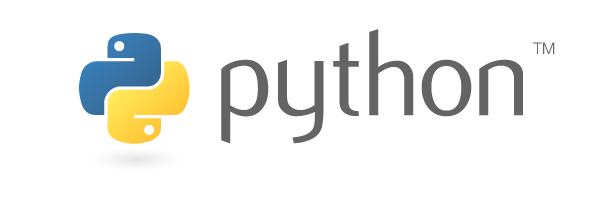

## Python Object Scopes, aka Variable Scopes

  - ### It may not be what you expect!
  - ### How does Python find the object that matches your reference in a program?
  - ### Danger 1: You modify an object in another scope accidently.
  - ### Danger 2: You create an object that hides another object that you need.
______

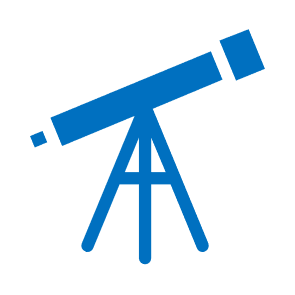

#### Great book I drew from is:
#### Learning Python by Mark Lutz

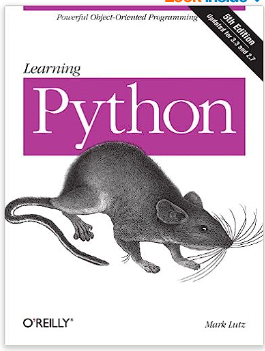

# Python Scoping Levels: 
### - local (lower level than global like in a function)
### - enclosing 
### - global (at the module level)
### - built-in (Python)

### - Namespaces have their own scope, i.e., import pandas as pd
   - #### pd.read_csv() is only within the pd namespace.

### Blog at: 
https://realpython.com/python-scope-legb-rule/

# Outer Most Scope: builtins

In [1]:
dir(__builtins__)  # lists the builtins objects

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

### We can import the builtins directly but why bother as it is imported for us already!

In [2]:
import builtins as bi

bi.len('bryan')
bi.print('Hi there!')

Hi there!


#### Global = Module Level Scope

In [3]:
myglobal_var1 = 2
myglobal_var2 = 'Bryan'

- dir() will give you the list of in-scope variables
- globals() will give you a dictionary of global variables
- locals() will give you a dictionary of local variables

docs: https://docs.python.org/3/library/functions.html#globals

In [4]:
dir()

['In',
 'Out',
 '_',
 '_1',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'bi',
 'exit',
 'get_ipython',
 'myglobal_var1',
 'myglobal_var2',
 'quit']

### Use a dictionary comprehension to get the global variables we created.

In [5]:
globaldict = globals()  # get the dict of objects
[print(keys) for keys in globaldict if keys.startswith('my')]

myglobal_var1
myglobal_var2


[None, None]

In [6]:
locals() # is relative to where you exectue the function

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'dir(__builtins__)  # lists the builtins objects',
  "import builtins as bi\n\nbi.len('bryan')\nbi.print('Hi there!')",
  "myglobal_var1 = 2\nmyglobal_var2 = 'Bryan'",
  'dir()',
  "globaldict = globals()  # get the dict of objects\n[print(keys) for keys in globaldict if keys.startswith('my')]",
  'locals() # is relative to where you exectue the function'],
 '_oh': {1: ['ArithmeticError',
   'AssertionError',
   'AttributeError',
   'BaseException',
   'BlockingIOError',
   'BrokenPipeError',
   'BufferError',
   'BytesWarning',
   'ChildProcessError',
   'ConnectionAbortedError',
   'ConnectionError',
   'ConnectionRefusedError',
   'ConnectionResetError',
   'DeprecationWarning',
   'EOFError',
   'Ellipsis',


In [7]:
def function_one(in1:str):
    function_var1 = 1
    print('variables in the function local scope: ', locals())
    
function_one('somestring')    

variables in the function local scope:  {'in1': 'somestring', 'function_var1': 1}


In [8]:
print(myglobal_var1)
print(myglobal_var2)

2
Bryan


In [9]:
def my_function():
    print('myglobal_var1: ', myglobal_var1)  # Reads the next scope up, i.e. global
    myglobal_var2 = 'test'                   # assignments ALWAYS create variables in the current local scope

my_function()

myglobal_var1:  2


In [10]:
myglobal_var2

'Bryan'

In [11]:
# If you assign a value to global variable after it was already referenced 
# it will fail because the the assignment causes ALL the variable name references
# in the function to refer to a local scoped variable.
def my_function():
    print('myglobal_var1: ', myglobal_var1)
    myglobal_var1 = 'test'  # causes the line above to fail! 

my_function()

UnboundLocalError: local variable 'myglobal_var1' referenced before assignment

In [12]:
def my_function():
    myglobal_var1 = 'test'  # No longer causes an error 
    print('myglobal_var1: ', myglobal_var1)

my_function()

myglobal_var1:  test


### Nested functions, enclosing scopes

In [13]:
def outer_function(first, second):
    outer_function_var1 = 'somevalue'
    print("locals to outer_function: ", locals())
    
    def inner_function():
        print("\nlocals to inner_function: ", locals())
    
    inner_function()
              
              
outer_function('first_parm', 'second_parm')   

locals to outer_function:  {'first': 'first_parm', 'second': 'second_parm', 'outer_function_var1': 'somevalue'}

locals to inner_function:  {}


In [14]:
def outer_function(first, second):
    outer_function_var1 = 'somevalue'
    print("locals to outer_function: ", locals())
    
    def inner_function():
        print("\nvariable from outer_function: ", outer_function_var1)
        print("locals to inner_function: ", locals())
    
    inner_function()
              
              
outer_function('first_parm', 'second_parm')   

locals to outer_function:  {'first': 'first_parm', 'second': 'second_parm', 'outer_function_var1': 'somevalue'}

variable from outer_function:  somevalue
locals to inner_function:  {'outer_function_var1': 'somevalue'}


In [15]:
def outer_function(first, second):
    outer_function_var1 = 'somevalue'
    print("locals to outer_function: ", locals())
    
    def inner_function():
        outer_function_var1 = "new value"
        first = 'new first'
        print("\nvariable from outer_function: ", outer_function_var1)
        print("locals to inner_function: ", locals())    
    
    inner_function()
    
    print('\nouter_function_var1 after inner_function call: ', outer_function_var1)
    print('first parameter value after inner_function call: ', first)
           
              
outer_function('first_parm', 'second_parm')  

locals to outer_function:  {'first': 'first_parm', 'second': 'second_parm', 'outer_function_var1': 'somevalue'}

variable from outer_function:  new value
locals to inner_function:  {'outer_function_var1': 'new value', 'first': 'new first'}

outer_function_var1 after inner_function call:  somevalue
first parameter value after inner_function call:  first_parm


In [16]:
myglobal_var1

2

### How to change variable values in outer scopes
- Explicit is better than implicit

In [17]:
def outer_function(first, second):
    enclosing_var = 'outer_function'
    
    def inner_function():
        global myglobal_var1                 # set reference for this object to the global scope
        myglobal_var1 = "new value"          # changes the value in the global scope
        
        nonlocal enclosing_var               # set reference for this object to the enclosing scope
        enclosing_var = 'inner function'     # changes the value in the enclosing scope
        
        first = 'new first'
        print("locals to inner_function: ", locals())    
    
    inner_function()
    
    print('\nGlobal Variable: ', myglobal_var1)
    print('\nenclosing_var after inner_function call: ', enclosing_var)
           
              
outer_function('first_parm', 'second_parm')  

locals to inner_function:  {'first': 'new first', 'enclosing_var': 'inner function'}

Global Variable:  new value

enclosing_var after inner_function call:  inner function


In [18]:
myglobal_var1  # global variable is changed

'new value'

## Module namespaces

#### The global scope is actually contained in the module namespace ```__main__```

In [19]:
print("Current module is: {}" .format(__name__))

Current module is: __main__


### Imported modules have their own namespace if imported with the import statement as shown below
```
import modulename 
import modulename as somealias
```

In [20]:
import pandas as pd  # Gets it own namespace!

dir(pd)

['BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_hashtable',
 '_is_numpy_dev',
 '_lib',
 '_libs',
 '_np_version_under1p18',
 '_testing',
 '_tslib',
 '_typing',
 

Using the import format
```
from modulename import object
```
imports copies the object into the global namespace!

In [21]:
from pandas import read_csv  # copies into the global namespace

dir()

['In',
 'Out',
 '_',
 '_1',
 '_10',
 '_16',
 '_18',
 '_20',
 '_4',
 '_5',
 '_6',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'bi',
 'exit',
 'function_one',
 'get_ipython',
 'globaldict',
 'my_function',
 'myglobal_var1',
 'myglobal_var2',
 'outer_function',
 'pd',
 'quit',
 'read_csv']

### This means we can accidently (or intentially) replace it hiding the original.

In [22]:
def read_csv():
    print('Doh!  Where did the pandas read_csv go?')

In [23]:
read_csv()  # This can create difficult to find bugs!

Doh!  Where did the pandas read_csv go?


## Take-A-Ways
#### - Each inner scope can read the objects in higher level scopes.
#### - If the same object name is assigned a value in a lower scope, it creates a new object in that scope, masking or hiding the object in the higher-level scope. Unless you use the global or nonlocal keywords. 
#### - Modules get their own namespace when imported using the import module_name syntax.
#### - To change global variables in a lower scope, declare the variable in that scope using the ```global``` keyword.
#### - To change eclosing variables in a lower scope, declare the variable in that scope using the ```nonlocal``` keyword.